In [47]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

SIM_DIR = './sim_dat/'

In [48]:
sim_names = os.listdir(SIM_DIR)
sim_names.remove('man_who_kick_can_static.csv')

In [49]:
dataframes = {}
for name in sim_names:
    input_name = name[:-4]
    dataframes[input_name] = pd.read_csv(SIM_DIR + name)
    dataframes[input_name]['input_name'] = input_name
combined_df = pd.concat(dataframes.values()) # concatenates all the dataframes

In [50]:
# quick data exploration
combined_df.head()

,seed,input_rate,max_time,num_restarts,deact_weight,time_pressure,act_rest,input_name,sub_threshold,coop_weight,...,noise_std,ext_weight,conf_threshold,utterance_intervals,cxn_usage_count,syntactic_complexity,utterance_lengths,requested_info,max_BLEU_score,utterance
0,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,1.0,0.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,10.0,0.3,130.0,8.0,0.250000,6.500000,NaN,1.0,<START><27>man is punch -ed by lady<157>wateri...
2,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,2.0,1.0,0.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,2.0,10.0,0.3,137.0,8.0,0.250000,6.500000,NaN,1.0,<START><29>man is punch -ed by lady<166>wateri...
4,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,1.0,0.3,139.0,11.0,0.194444,5.333333,NaN,1.0,<START><51>man is punch -ed by lady<329>man th...


In [51]:
df_stats = combined_df.groupby(['input_name']).agg([np.mean, np.std])

In [52]:
s = df_stats['max_BLEU_score', 'mean']

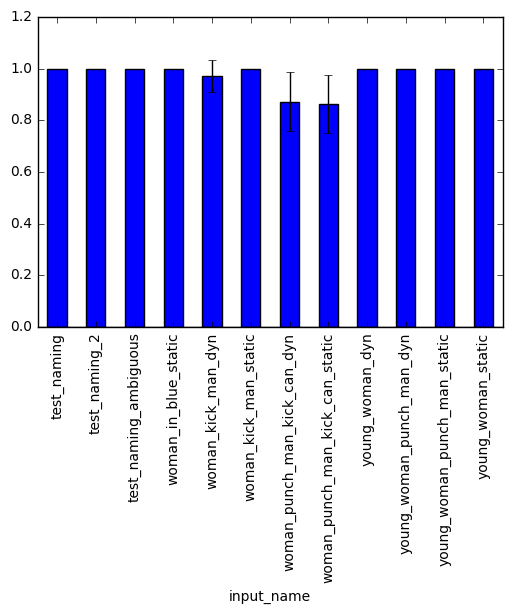

In [53]:
plt.figure()
s.plot.bar(yerr=df_stats['max_BLEU_score', 'std']); plt.axhline(0, color='k')